# Checking interpolation of phonon modes

In this tutorial, we will try to plot the phonon modes and its derivatives as functions of volume.

## Load the configuration and run the `Calculator`

Same as performing calculations programatically, we need to load the `qha-cij` calculator first.

In [1]:
import cij.core.calculator


calculator = cij.core.calculator.Calculator("_attachments/plotting/config.yml")

/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_modulus.py:88: RuntimeWarning: divide by zero encountered in true_divide
  return  h_div_k * (self.freq_array[nax,:,:,:] / self.t_array[:,nax,nax,nax])
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_modulus.py:88: RuntimeWarning: invalid value encountered in true_divide
  return  h_div_k * (self.freq_array[nax,:,:,:] / self.t_array[:,nax,nax,nax])
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_modulus.py:96: RuntimeWarning: overflow encountered in exp
  return self.Q ** 2 * numpy.exp(self.Q) / (numpy.exp(self.Q) - 1) ** 2
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_modulus.py:96: RuntimeWarning: overflow encountered in square
  return self.Q ** 2 * numpy.exp(self.Q) / (numpy.exp(self.Q) - 1) ** 2
/Users/chazeon/Documents/Projects/qha-cij-2/cij/core/phonon_modulus.py:96: RuntimeWarning: invalid value encountered in true_divide
  return self.Q ** 2 * numpy.exp(self.Q) / (numpy.exp(self.Q

## Plotting the interploated phonon modes and its derivatives

To plot phonon modes, we could use the `ModePlotter` module.

To use this module, we mport it first, and create a `ModePlotter` object `plotter` and initialize it with the `Calculator` we prepared above. With the `plotter` we can easily plot the interpolated mode frequency $\omega_{qm}(V)$, Grüneisen parameter $\gamma_{qm}(V)$ and $V\partial\gamma_{qm}/\partial V$ with it.

In [2]:
from cij.plot import ModePlotter
from matplotlib import pyplot as plt

plotter = ModePlotter(calculator)

The method used for plotting these parameters as a function of volumes (in Å$^3$) is `plot_modes`, the first parameter is the `pyplot` handle or an Matplotlib `Axes`. Two other optional parameters controls the behavior of the plotting method

- `n` controls is the order of derivatives, where
  - `n = 0` (default) plots interpolated mode frequency $\omega_{qm}(V)$, and additionally scatters the uninterpolated phonon frequency data as in the QHA input with it.
  - `n = 1` plots Grüneisen parameter $\gamma_{qm}(V)$
  - `n = 2` plots $V\partial\gamma_{qm}/\partial V$
- `iq` controls the $q$ point to plot on, usually, `iq = 0` means you are plotting all the modes at $\Gamma$ point.

In the following 3 pieces of codes, I plot mode frequency $\omega_{qm}(V)$, Grüneisen parameter $\gamma_{qm}(V)$ and $V\partial\gamma_{qm}/\partial V$ respectively at $\Gamma$ point respectively.

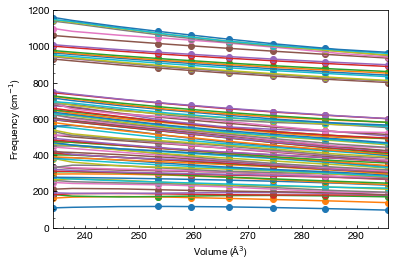

In [3]:
plt.figure()

plotter.plot_modes(plt, n = 0)

plt.ylim(0, 1200)
plt.xlim(min(plotter.volumes), max(plotter.volumes))
plt.xlabel("Volume (Å$^3$)")
plt.ylabel("Frequency (cm$^{-1}$)")

plt.show()

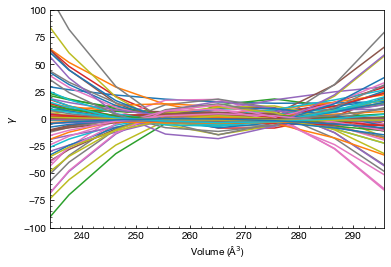

In [4]:
plt.figure()

plotter.plot_modes(plt, n = 1)

plt.ylim(-100, 100)
plt.xlim(min(plotter.volumes), max(plotter.volumes))
plt.xlabel("Volume (Å$^3$)")
plt.ylabel("$\\gamma$")

plt.show()

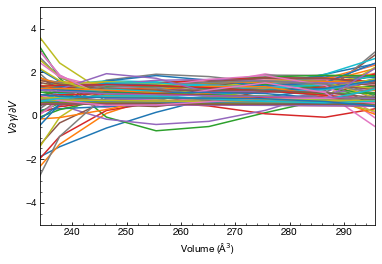

In [5]:
plt.figure()

plotter.plot_modes(plt, n = 2)

plt.ylim(-5, 5)
plt.xlim(min(plotter.volumes), max(plotter.volumes))
plt.xlabel("Volume (Å$^3$)")
plt.ylabel("$V\\partial\\gamma/\\partial V$")

plt.show()